# Small Image Classification Using Convolutional Neural Network(CNN)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## Loading the data

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

# The train data contains 50000 images with 32 pixels X 32 pixels with 3 colors.
# The test data contains 10000 images with 32 pixels X 32 pixels with 3 colors (RGB - Red, Blue, Green)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

- y_train is a 2D array with 50000 rows and 1 column
- For out classification having 1D array is good enough, so we convert the 2D array to 1D array.

In [6]:
y_train = y_train.reshape(-1, )

In [7]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_train.shape

(50000,)

https://www.cs.toronto.edu/~kriz/cifar.html

In [9]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [14]:
# Lets plot some data

def plot_sample(X, y, index):
  plt.figure(figsize = (15, 2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


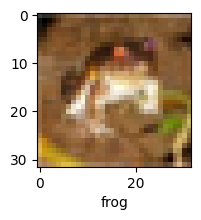

In [15]:
plot_sample(X_train, y_train, 0)    ### Checking the 1st image in out data

#### The image above is a frog image
- It is blur because the image is of 32 pixel X 32 pixels only
- If it was 1920 pixel X 1080 pixel it would be HD image

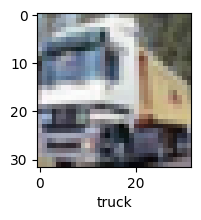

In [16]:
plot_sample(X_train, y_train, 0)

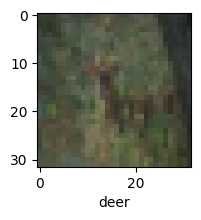

In [17]:
plot_sample(X_train, y_train, 10)

# Normalizing the images to a number between 0 to 1. Image has 3 channels(R,G,B) and each has a value in the channel ranging from 0 to 255, Hence, to normalize in 0 to 1 range, Divide the train and test set by 255

In [18]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Bulding a simple Artificial Neural Network for image classification

In [19]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8124 - accuracy: 0.3550
Epoch 2/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.6233 - accuracy: 0.4274
Epoch 3/5
1563/1563 [==============================] - 143s 92ms/step - loss: 1.5385 - accuracy: 0.4577
Epoch 4/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.4814 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 131s 84ms/step - loss: 1.4318 - accuracy: 0.4948


In [20]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.63      0.56      1000
           1       0.50      0.70      0.59      1000
           2       0.43      0.31      0.36      1000
           3       0.38      0.22      0.27      1000
           4       0.55      0.27      0.36      1000
           5       0.34      0.44      0.39      1000
           6       0.53      0.55      0.54      1000
           7       0.56      0.51      0.53      1000
           8       0.74      0.43      0.54      1000
           9       0.40      0.69      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



# A simple Convolutional neural Network

In [21]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 61s 38ms/step - loss: 1.4972 - accuracy: 0.4614
Epoch 2/3
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1416 - accuracy: 0.5976
Epoch 3/3
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0112 - accuracy: 0.6470


In [24]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9949 - accuracy: 0.6598


[0.9948576092720032, 0.6597999930381775]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[1.2988452e-02, 1.0427112e-03, 3.0965980e-02, 5.8187336e-01,
        5.8627878e-03, 2.4627829e-01, 7.4539900e-02, 1.4113508e-03,
        3.9392579e-02, 5.6445519e-03],
       [3.6347777e-02, 2.6353565e-01, 2.9974902e-04, 7.2976683e-05,
        4.4588742e-05, 1.8468850e-06, 4.4618832e-06, 1.8259505e-05,
        6.7704242e-01, 2.2632206e-02],
       [5.7322498e-02, 4.2410672e-01, 1.5827792e-02, 1.8856537e-02,
        4.0987493e-03, 2.6388264e-03, 2.5018884e-03, 2.2020228e-03,
        3.4223080e-01, 1.3021423e-01],
       [5.1682359e-01, 1.0487548e-01, 2.4333233e-02, 2.4035915e-03,
        5.7443432e-03, 2.4244041e-04, 1.3668790e-03, 2.2625101e-04,
        3.3597478e-01, 8.0093779e-03],
       [2.5330536e-04, 5.2991312e-04, 3.6435213e-02, 1.3663805e-01,
        4.7785378e-01, 8.9602172e-02, 2.5767261e-01, 4.4082972e-04,
        3.4016243e-04, 2.3394143e-04]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

TypeError: only integer scalar arrays can be converted to a scalar index

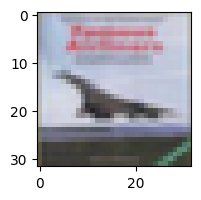

In [27]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]